<a href="https://colab.research.google.com/github/monika-chivate/exam/blob/main/Predict_the_House_Prices_using_Artificial_Neural_Network_Regression_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##STEP#0: Import Libraries

In [ ]:
#!pip install tensorflow-gpu==2.0.0.alpha0

In [ ]:
!pip uninstall -y tensorflow
!pip install tensorflow

Uninstalling tensorflow-2.3.0:
  Successfully uninstalled tensorflow-2.3.0
  Using cached https://files.pythonhosted.org/packages/97/ae/0b08f53498417914f2274cc3b5576d2b83179b0cbb209457d0fde0152174/tensorflow-2.3.0-cp36-cp36m-manylinux2010_x86_64.whl


In [ ]:
import tensorflow as tf
import pandas as pd
import seaborn as sns  # to plot images and statical version of data
import numpy as np
import matplotlib.pyplot as plt

## STEP #1: Importing Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
house_sale = pd.read_csv('/content/drive/My Drive/ML_Dataset/House Sale Prediction/kc_house_data.csv')

In [ ]:
house_sale

id             date  ...  sqft_living15  sqft_lot15
0      7129300520  20141013T000000  ...           1340        5650
1      6414100192  20141209T000000  ...           1690        7639
2      5631500400  20150225T000000  ...           2720        8062
3      2487200875  20141209T000000  ...           1360        5000
4      1954400510  20150218T000000  ...           1800        7503
...           ...              ...  ...            ...         ...
21608   263000018  20140521T000000  ...           1530        1509
21609  6600060120  20150223T000000  ...           1830        7200
21610  1523300141  20140623T000000  ...           1020        2007
21611   291310100  20150116T000000  ...           1410        1287
21612  1523300157  20141015T000000  ...           1020        1357

[21613 rows x 21 columns]

In [ ]:
house_sale.head()

id             date     price  ...     long  sqft_living15  sqft_lot15
0  7129300520  20141013T000000  221900.0  ... -122.257           1340        5650
1  6414100192  20141209T000000  538000.0  ... -122.319           1690        7639
2  5631500400  20150225T000000  180000.0  ... -122.233           2720        8062
3  2487200875  20141209T000000  604000.0  ... -122.393           1360        5000
4  1954400510  20150218T000000  510000.0  ... -122.045           1800        7503

[5 rows x 21 columns]

In [ ]:
house_sale.tail()

id             date  ...  sqft_living15  sqft_lot15
21608   263000018  20140521T000000  ...           1530        1509
21609  6600060120  20150223T000000  ...           1830        7200
21610  1523300141  20140623T000000  ...           1020        2007
21611   291310100  20150116T000000  ...           1410        1287
21612  1523300157  20141015T000000  ...           1020        1357

[5 rows x 21 columns]

In [ ]:
house_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
house_sale.describe()

id         price  ...  sqft_living15     sqft_lot15
count  2.161300e+04  2.161300e+04  ...   21613.000000   21613.000000
mean   4.580302e+09  5.400881e+05  ...    1986.552492   12768.455652
std    2.876566e+09  3.671272e+05  ...     685.391304   27304.179631
min    1.000102e+06  7.500000e+04  ...     399.000000     651.000000
25%    2.123049e+09  3.219500e+05  ...    1490.000000    5100.000000
50%    3.904930e+09  4.500000e+05  ...    1840.000000    7620.000000
75%    7.308900e+09  6.450000e+05  ...    2360.000000   10083.000000
max    9.900000e+09  7.700000e+06  ...    6210.000000  871200.000000

[8 rows x 20 columns]

## STEP #2: Visualize the Dataset

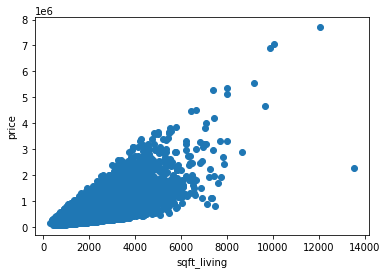

In [ ]:
plt.scatter(house_sale['sqft_living'], house_sale['price'])
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

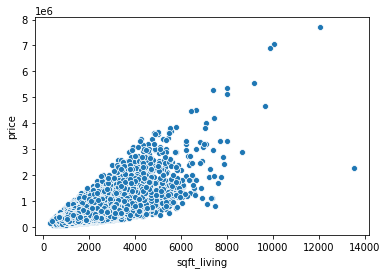

In [ ]:
sns.scatterplot(x= 'sqft_living', y= 'price', data=house_sale)
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

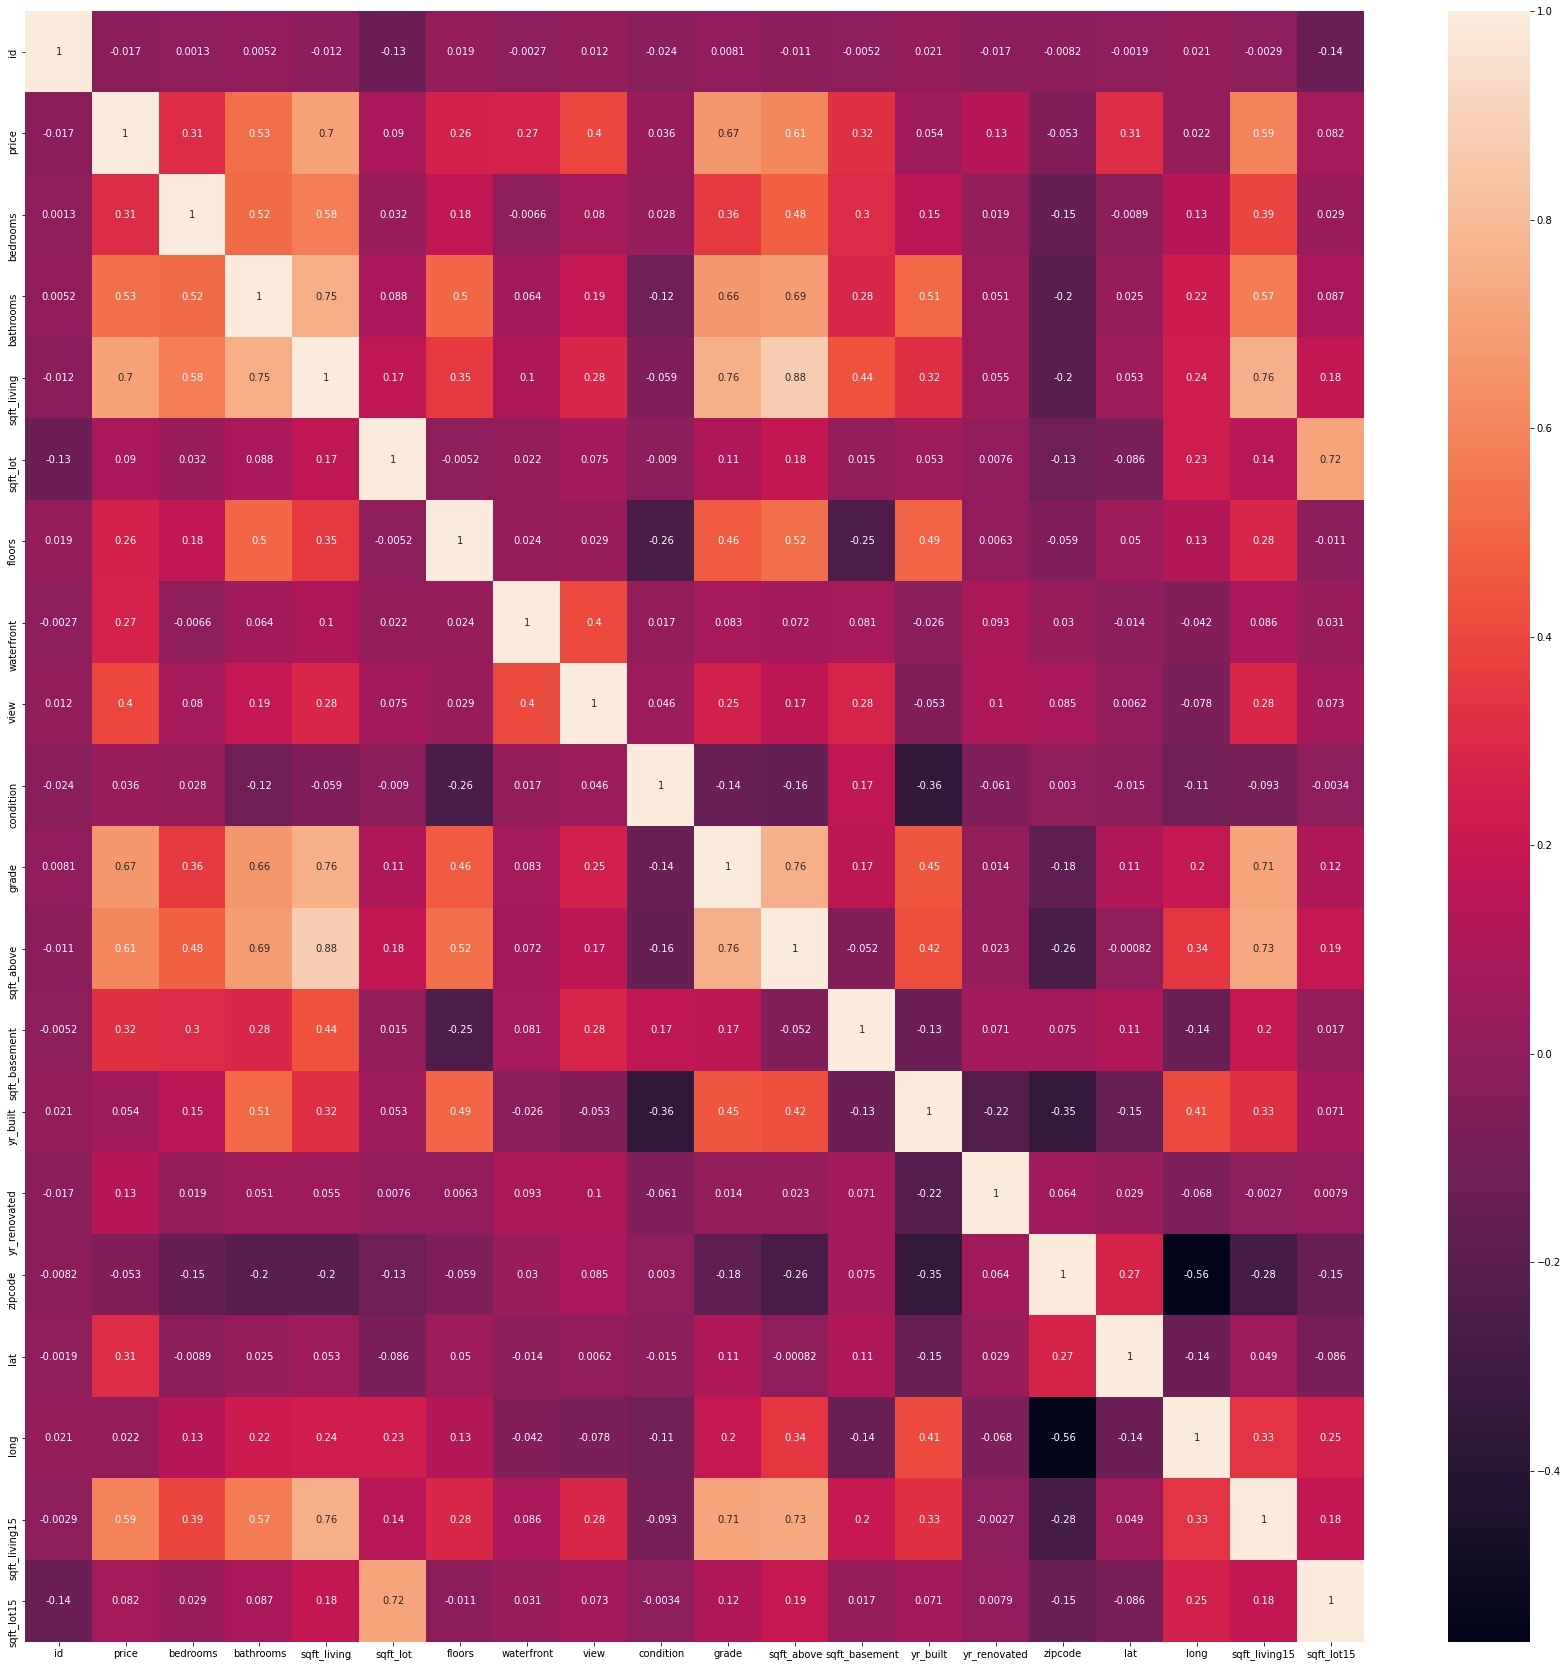

In [ ]:
# looking into the correlation between the independent variable
f, ax = plt.subplots(figsize = (30, 30))
sns.heatmap(house_sale.corr(), annot= True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f26ed911da0>,
      dtype=object)

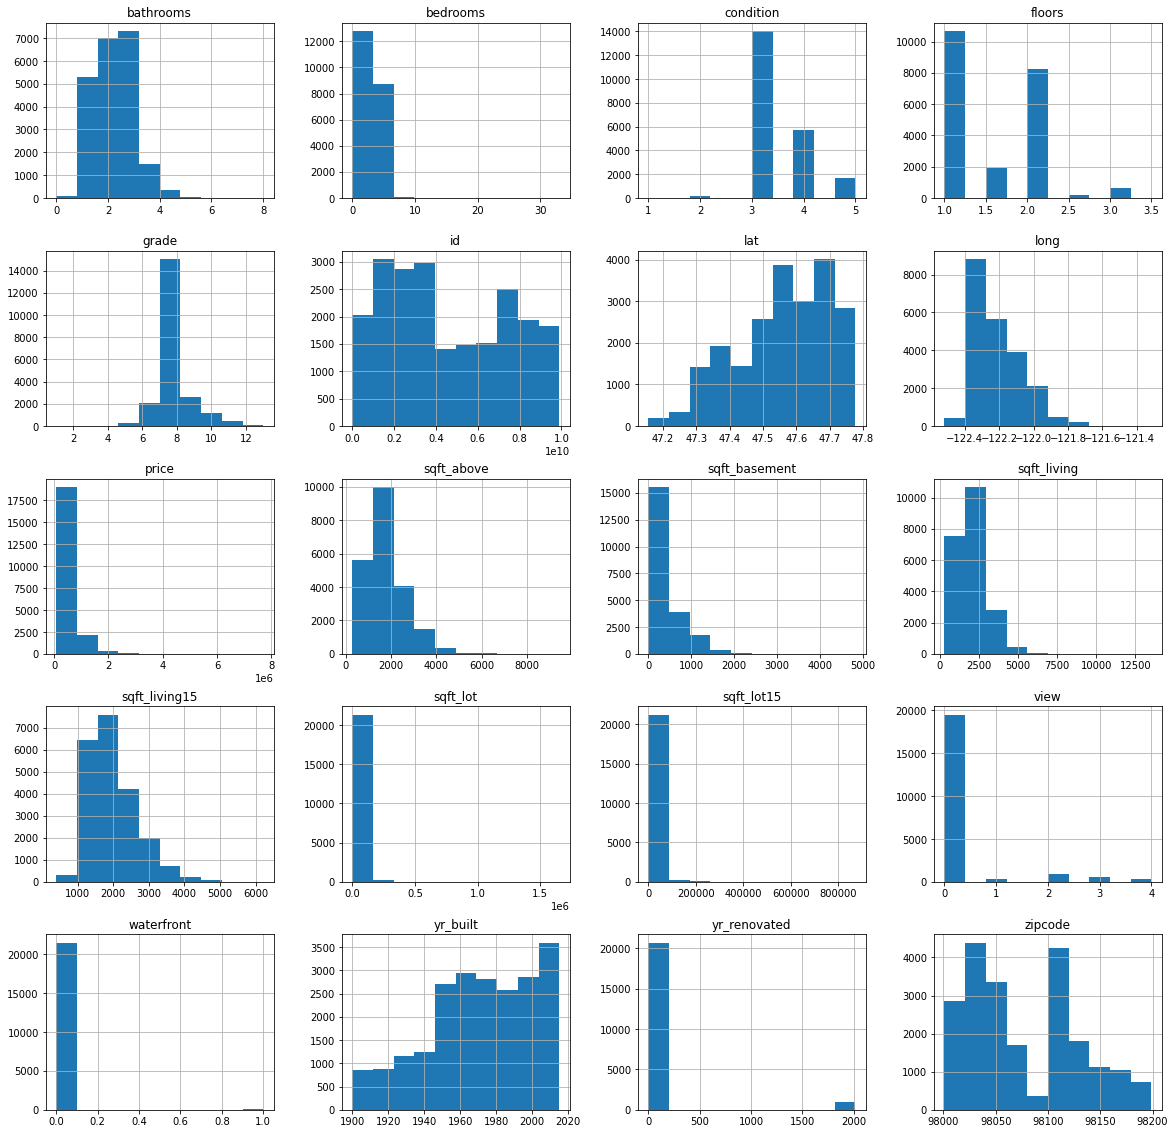

In [ ]:
# plotting histogram of the data (distribution of all the columns)
house_sale.hist(figsize = (20,20))

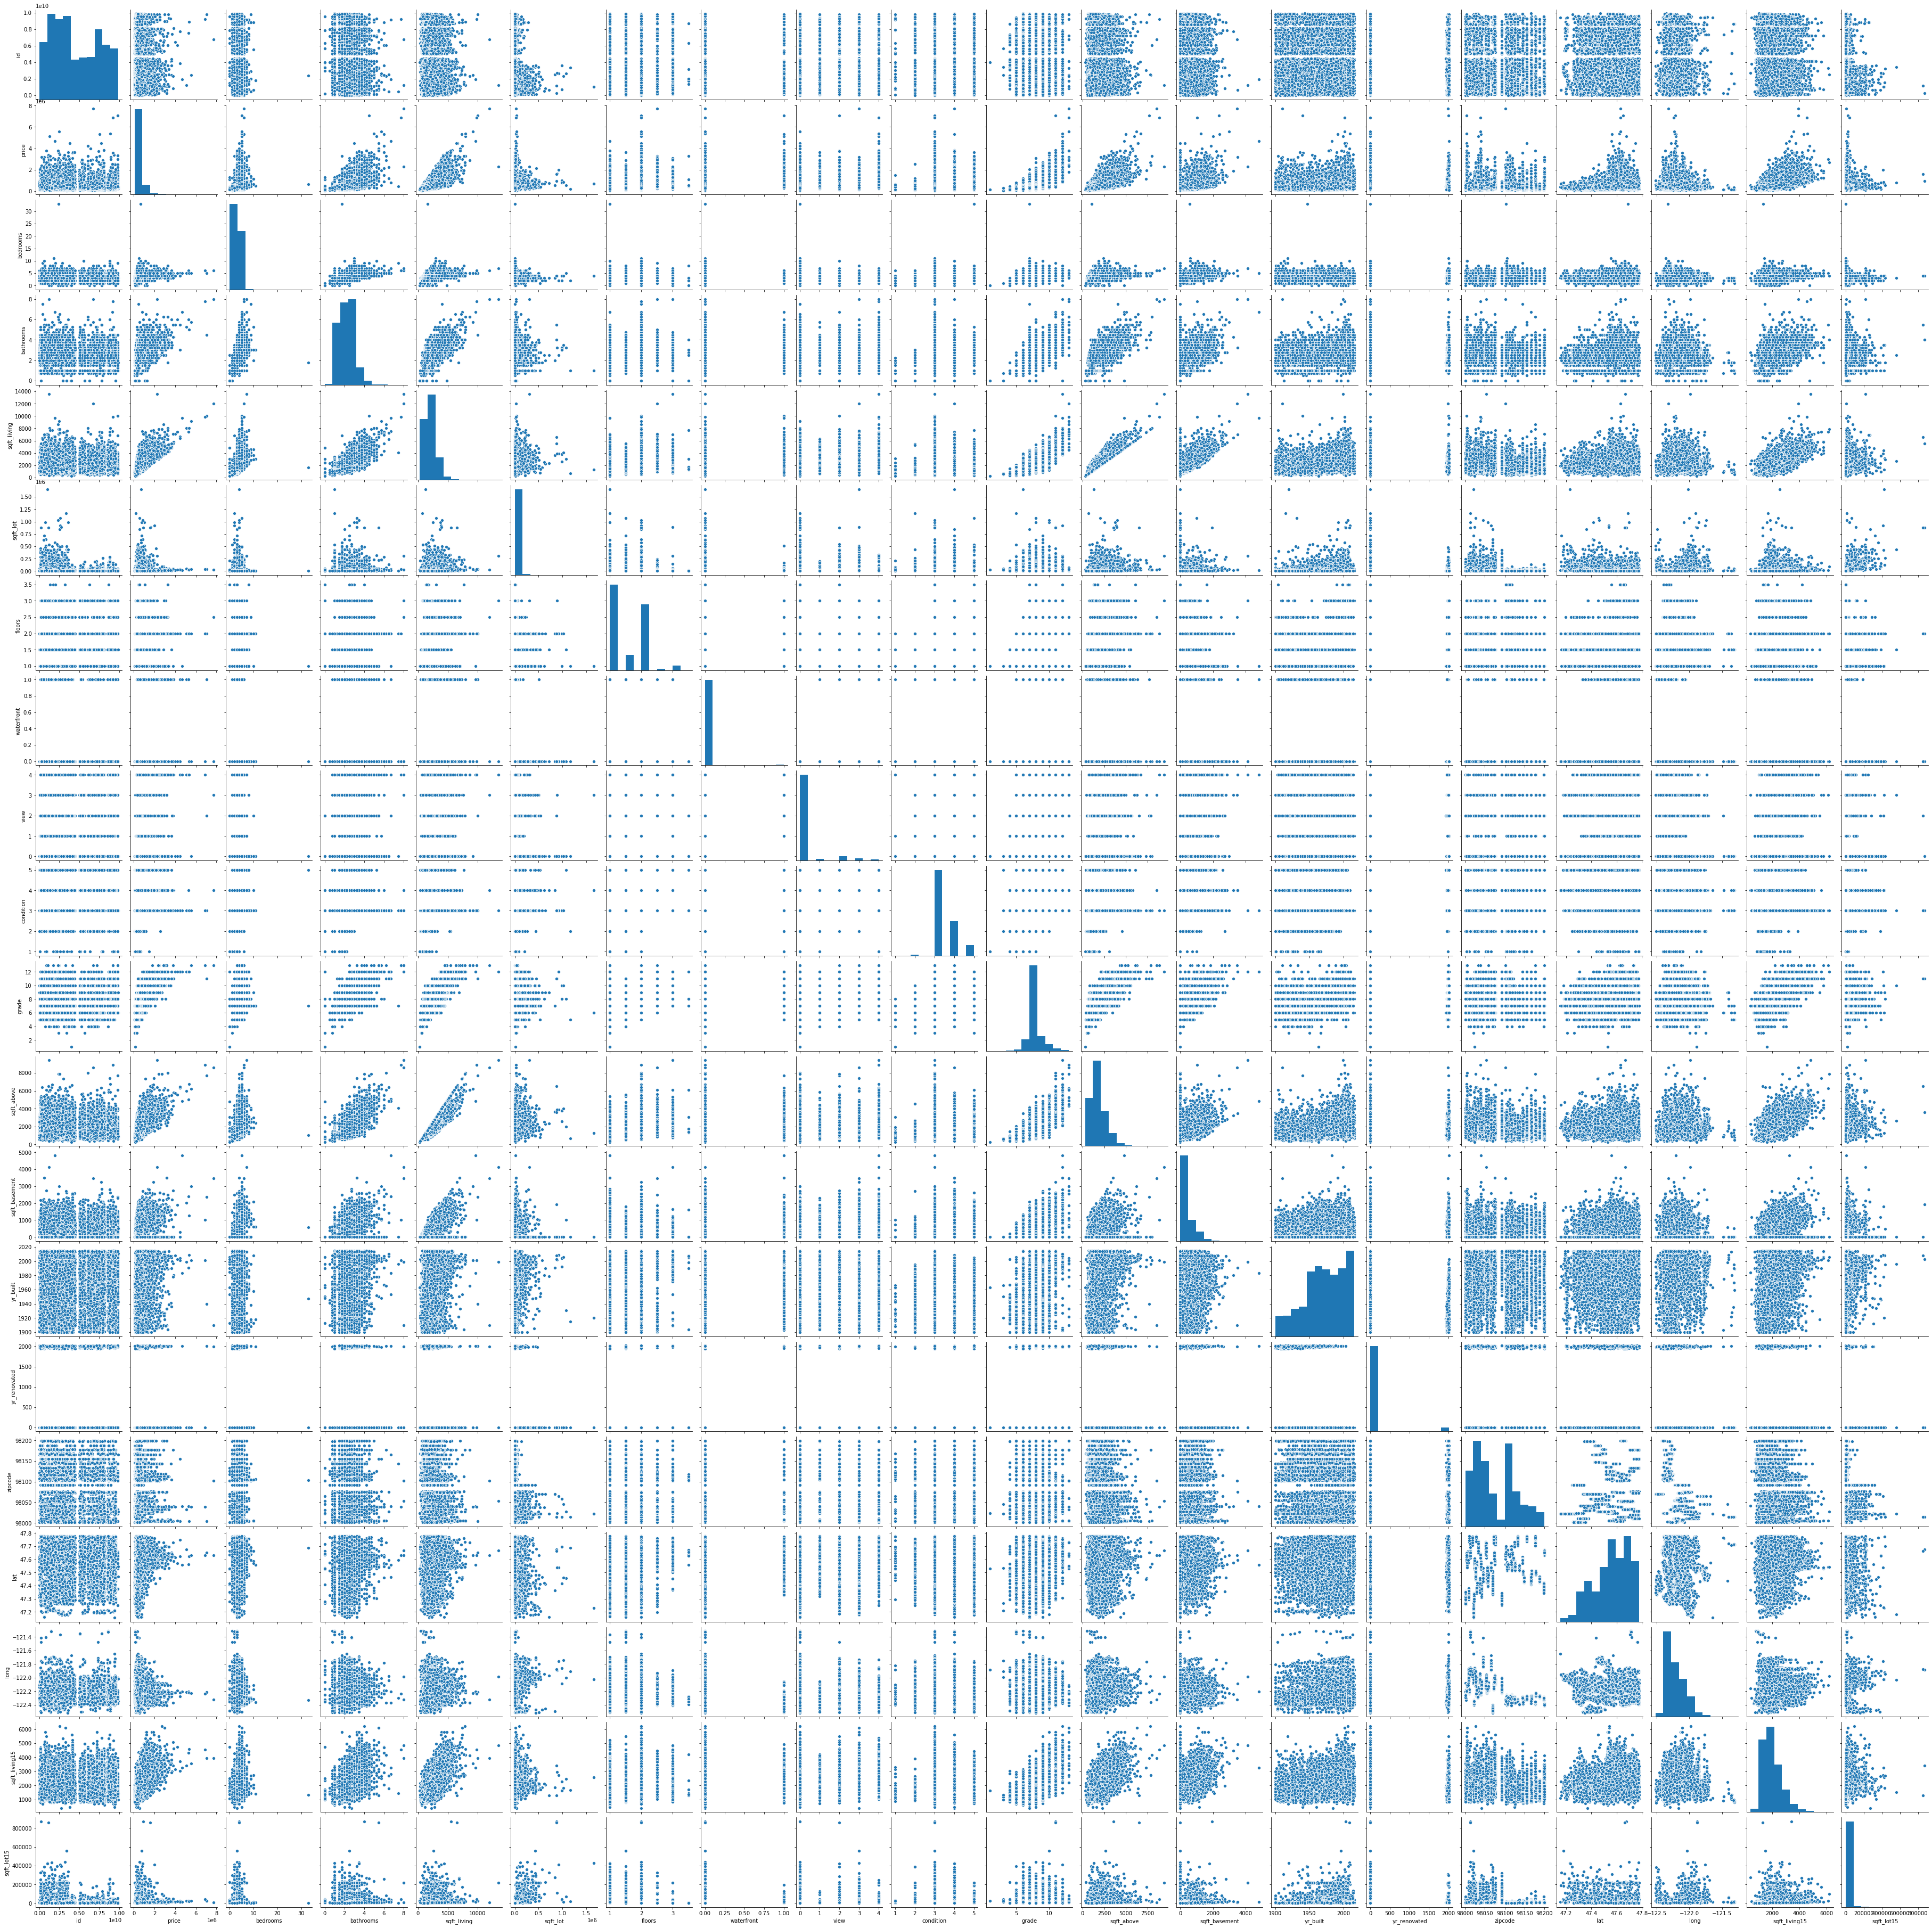

In [ ]:
sns.pairplot(house_sale)

## STEP #3 Creating Training & Testing Dataset

In [ ]:
X = house_sale[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement']]

In [ ]:
X

bedrooms  bathrooms  sqft_living  ...  floors  sqft_above  sqft_basement
0             3       1.00         1180  ...     1.0        1180              0
1             3       2.25         2570  ...     2.0        2170            400
2             2       1.00          770  ...     1.0         770              0
3             4       3.00         1960  ...     1.0        1050            910
4             3       2.00         1680  ...     1.0        1680              0
...         ...        ...          ...  ...     ...         ...            ...
21608         3       2.50         1530  ...     3.0        1530              0
21609         4       2.50         2310  ...     2.0        2310              0
21610         2       0.75         1020  ...     2.0        1020              0
21611         3       2.50         1600  ...     2.0        1600              0
21612         2       0.75         1020  ...     2.0        1020              0

[21613 rows x 7 columns]

In [ ]:
y = house_sale['price']

In [ ]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [ ]:
X.shape

(21613, 7)

In [ ]:
y.shape

(21613,)

In [ ]:
# the output data is not normalised, so making it normalized usign skit learn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

array([[0.09090909, 0.125     , 0.06716981, ..., 0.        , 0.09758772,
        0.        ],
       [0.09090909, 0.28125   , 0.17207547, ..., 0.4       , 0.20614035,
        0.08298755],
       [0.06060606, 0.125     , 0.03622642, ..., 0.        , 0.05263158,
        0.        ],
       ...,
       [0.06060606, 0.09375   , 0.05509434, ..., 0.4       , 0.08004386,
        0.        ],
       [0.09090909, 0.3125    , 0.09886792, ..., 0.4       , 0.14364035,
        0.        ],
       [0.06060606, 0.09375   , 0.05509434, ..., 0.4       , 0.08004386,
        0.        ]])

In [ ]:
X_scaled.shape

(21613, 7)

In [ ]:
scaler.data_max_


array([3.300000e+01, 8.000000e+00, 1.354000e+04, 1.651359e+06,
       3.500000e+00, 9.410000e+03, 4.820000e+03])

In [ ]:
scaler.data_min_


array([  0.,   0., 290., 520.,   1., 290.,   0.])

In [ ]:
y = y.values.reshape(-1,1)

In [ ]:
y_scaled = scaler.fit_transform(y)

In [ ]:
y_scaled

array([[0.01926557],
       [0.06072131],
       [0.01377049],
       ...,
       [0.04289849],
       [0.04262295],
       [0.03278689]])

## STEP #4: Training the model

In [ ]:
# spilitting data into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, train_size = 0.75)

In [ ]:
X_train.shape

(16209, 7)

In [ ]:
X_test.shape

(5404, 7)

In [ ]:
# in tensorflow 2.0, keras API come automatically with tensorflow 2.0
ANN_model = tf.keras.models.Sequential()
ANN_model.add(tf.keras.layers.Dense(units = 100, activation = 'relu', input_shape = (7,))) #we use Dense when we have fully connected atificial neural network
# now we are adding one more layer to the network
ANN_model.add(tf.keras.layers.Dense(units = 100, activation = 'relu'))
ANN_model.add(tf.keras.layers.Dense(units = 100, activation = 'relu'))
# now adding the output layer
ANN_model.add(tf.keras.layers.Dense(units = 1, activation = 'linear'))

ANN_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 100)               800       
_________________________________________________________________
dense_17 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_18 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 101       
Total params: 21,101
Trainable params: 21,101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
ANN_model.compile(optimizer = 'Adam', loss= 'mean_squared_error')

In [ ]:
# Splitting training dataset with validation, so that model can preditc validation dataset simultaneously as well
hist = ANN_model.fit(X_train, y_train, epochs = 100, batch_size=50, validation_split = 0.2)

Epoch 1/100
260/260 [==============================] - 1s 3ms/step - loss: 9.9764e-04 - val_loss: 9.8433e-04
Epoch 2/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 3/100
260/260 [==============================] - 1s 2ms/step - loss: 9.8784e-04 - val_loss: 9.7707e-04
Epoch 4/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0010 - val_loss: 9.9992e-04
Epoch 5/100
260/260 [==============================] - 1s 2ms/step - loss: 9.7593e-04 - val_loss: 9.6968e-04
Epoch 6/100
260/260 [==============================] - 1s 3ms/step - loss: 9.9021e-04 - val_loss: 9.6954e-04
Epoch 7/100
260/260 [==============================] - 1s 2ms/step - loss: 9.8544e-04 - val_loss: 0.0010
Epoch 8/100
260/260 [==============================] - 1s 2ms/step - loss: 9.9254e-04 - val_loss: 9.8957e-04
Epoch 9/100
260/260 [==============================] - 1s 2ms/step - loss: 9.7671e-04 - val_loss: 9.7999e-04
Epoch 10/100
260/260 [=============

## STEP #5: Evaluating the Model

In [ ]:
hist.history.keys()

dict_keys(['loss', 'val_loss'])

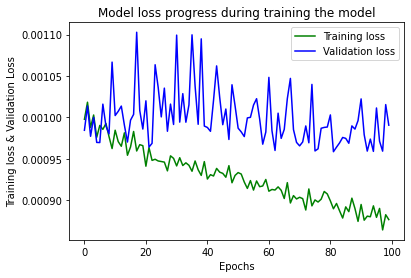

In [ ]:
plt.plot(hist.history['loss'], color='g', label='Training loss')
plt.plot(hist.history['val_loss'], color='b', label='Validation loss')
plt.title('Model loss progress during training the model')
plt.xlabel('Epochs')
plt.ylabel('Training loss & Validation Loss')
plt.legend()
plt.show()

In [ ]:
#  'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement'
X_test_1 = np.array([[4, 3, 1960, 5000, 1, 2000, 3000]])

scaler_1 = MinMaxScaler()
X_test_scaled_1 = scaler_1.fit_transform(X_test_1)

y_predict_1 = model.predict(X_test_scaled_1) #predicting the values

y_predict_1 = scaler.inverse_transform(y_predict_1)
y_predict_1

array([[176315.11]], dtype=float32)

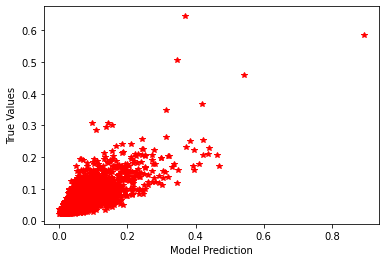

In [ ]:
y_predict = model.predict(X_test) #predicting the values
plt.plot(y_test, y_predict, '*', color = 'r')
plt.xlabel('Model Prediction')
plt.ylabel('True Values')
plt.show()

In [ ]:
# Taking Original Values as it was in the data set

y_predict_orig = scaler.inverse_transform(y_predict)

In [ ]:
# Taking Original Values as it was in the data set
y_test_orig = scaler.inverse_transform(y_test)


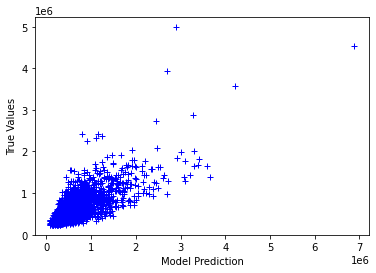

In [ ]:
plt.plot(y_test_orig, y_predict_orig, '+', color = 'b')
plt.xlabel('Model Prediction')
plt.ylabel('True Values')
plt.show()

In [ ]:
# Now visualising the Model performance with different error type
k = X_test.shape[1]

In [ ]:
k

7

In [ ]:
n = len(X_test)
n

5404

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)), '0.3f'))

In [ ]:
RMSE

234717.387

In [ ]:
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

In [ ]:
print('RMSE =', RMSE, '\nMSE=', MSE, '\nMAE=', MAE, '\nR2=', r2, '\nAdjusted R2=', adj_r2)

RMSE = 234717.387 
MSE= 55092251844.82254 
MAE= 152800.53145528774 
R2= 0.5732900736569873 
Adjusted R2= 0.5727365211209603


## Lets increase the number of feature (independent variables) and retrain the exact same model

In [ ]:
house_sale

id             date  ...  sqft_living15  sqft_lot15
0      7129300520  20141013T000000  ...           1340        5650
1      6414100192  20141209T000000  ...           1690        7639
2      5631500400  20150225T000000  ...           2720        8062
3      2487200875  20141209T000000  ...           1360        5000
4      1954400510  20150218T000000  ...           1800        7503
...           ...              ...  ...            ...         ...
21608   263000018  20140521T000000  ...           1530        1509
21609  6600060120  20150223T000000  ...           1830        7200
21610  1523300141  20140623T000000  ...           1020        2007
21611   291310100  20150116T000000  ...           1410        1287
21612  1523300157  20141015T000000  ...           1020        1357

[21613 rows x 21 columns]

In [ ]:
X_extended = house_sale.drop(['id', 'date', 'price'], axis=1)

In [ ]:
X_extended

bedrooms  bathrooms  sqft_living  ...     long  sqft_living15  sqft_lot15
0             3       1.00         1180  ... -122.257           1340        5650
1             3       2.25         2570  ... -122.319           1690        7639
2             2       1.00          770  ... -122.233           2720        8062
3             4       3.00         1960  ... -122.393           1360        5000
4             3       2.00         1680  ... -122.045           1800        7503
...         ...        ...          ...  ...      ...            ...         ...
21608         3       2.50         1530  ... -122.346           1530        1509
21609         4       2.50         2310  ... -122.362           1830        7200
21610         2       0.75         1020  ... -122.299           1020        2007
21611         3       2.50         1600  ... -122.069           1410        1287
21612         2       0.75         1020  ... -122.299           1020        1357

[21613 rows x 18 columns]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_extended)

In [ ]:
y = house_sale['price']

In [ ]:
y = y.values.reshape(-1,1)

In [ ]:
y_scaled = scaler.fit_transform(y)

In [ ]:
X_scaled.shape

(21613, 18)

In [ ]:
# spilitting data into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, train_size = 0.75)

In [ ]:
# in tensorflow 2.0, keras API come automatically with tensorflow 2.0
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 100, activation = 'relu', input_shape = (18,))) #we use Dense when we have fully connected atificial neural network
# now we are adding one more layer to the network
model.add(tf.keras.layers.Dense(units = 100, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 100, activation = 'relu'))
# now adding the output layer
model.add(tf.keras.layers.Dense(units = 1, activation = 'linear'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 100)               1900      
_________________________________________________________________
dense_21 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_22 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 101       
Total params: 22,201
Trainable params: 22,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'Adam', loss= 'mean_squared_error')

In [ ]:
# Splitting training dataset with validation, so that model can preditc validation dataset simultaneously as well
hist = model.fit(X_train, y_train, epochs = 100, batch_size=50, validation_split = 0.2)

Epoch 1/100
260/260 [==============================] - 1s 3ms/step - loss: 1.4603e-04 - val_loss: 2.8024e-04
Epoch 2/100
260/260 [==============================] - 1s 2ms/step - loss: 1.4089e-04 - val_loss: 2.8134e-04
Epoch 3/100
260/260 [==============================] - 1s 2ms/step - loss: 1.4060e-04 - val_loss: 2.6084e-04
Epoch 4/100
260/260 [==============================] - 1s 2ms/step - loss: 1.3473e-04 - val_loss: 2.8615e-04
Epoch 5/100
260/260 [==============================] - 1s 2ms/step - loss: 1.3460e-04 - val_loss: 2.8158e-04
Epoch 6/100
260/260 [==============================] - 1s 2ms/step - loss: 1.3588e-04 - val_loss: 2.6677e-04
Epoch 7/100
260/260 [==============================] - 1s 2ms/step - loss: 1.2788e-04 - val_loss: 3.0743e-04
Epoch 8/100
260/260 [==============================] - 1s 2ms/step - loss: 1.4568e-04 - val_loss: 2.6994e-04
Epoch 9/100
260/260 [==============================] - 1s 2ms/step - loss: 1.4817e-04 - val_loss: 2.7259e-04
Epoch 10/100
260/26

In [ ]:
hist.history.keys()

dict_keys(['loss', 'val_loss'])

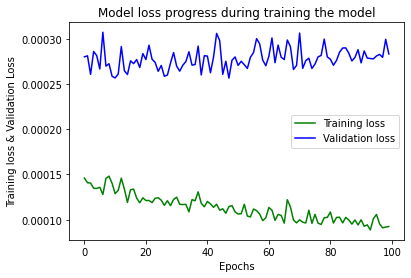

In [ ]:
plt.plot(hist.history['loss'], color='g', label='Training loss')
plt.plot(hist.history['val_loss'], color='b', label='Validation loss')
plt.title('Model loss progress during training the model')
plt.xlabel('Epochs')
plt.ylabel('Training loss & Validation Loss')
plt.legend()
plt.show()

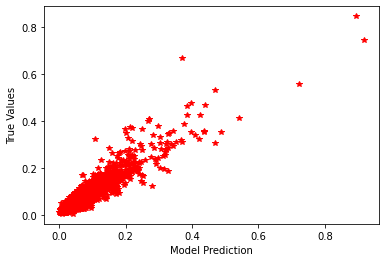

In [ ]:
y_predict = model.predict(X_test) #predicting the values
plt.plot(y_test, y_predict, '*', color = 'r')
plt.xlabel('Model Prediction')
plt.ylabel('True Values')
plt.show()

In [ ]:
# Taking Original Values as it was in the data set

y_predict_orig = scaler.inverse_transform(y_predict)

In [ ]:
# Taking Original Values as it was in the data set
y_test_orig = scaler.inverse_transform(y_test)

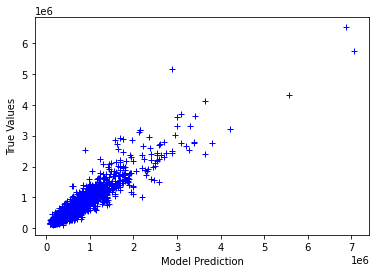

In [ ]:
plt.plot(y_test_orig, y_predict_orig, '+', color = 'b')
plt.xlabel('Model Prediction')
plt.ylabel('True Values')
plt.show()

In [ ]:
k = X_test.shape[1]
k

18

In [ ]:
n = len(X_test)
n

5404

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)), '0.3f'))

In [ ]:
RMSE

136002.121

In [ ]:
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

In [ ]:
print('RMSE =', RMSE, '\nMSE=', MSE, '\nMAE=', MAE, '\nR2=', r2, '\nAdjusted R2=', adj_r2)

RMSE = 136002.121 
MSE= 18496576990.8648 
MAE= 77238.29972878886 
R2= 0.8777103007757172 
Adjusted R2= 0.8773015329788673
